In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import matplotlib.cm as cm
import seaborn as sns
#import plotly. as py
#import plotly.graph_objs as go
font = {'family' : 'DejaVu Sans',
        'weight' : 'regular',
        'size'   : 16}

plt.rc('font', **font)
plt.rc('lines',lw=2)

In [34]:
expt_name = 'Obsidian3'; shorthand = 'Obs3'

In [3]:
# linux use this
data = tuple(csv.reader(open(expt_name+'_scaffold_cart.csv')))

# mac use this
#csvfile = open('ObsidianAssemblyStats.csv', 'Ur')#, newline='')
#data = list(csv.reader(csvfile, delimiter = ','))
contigorigin = list(open('/home/datastorage/Obsidian_annotationData_5kb/'+shorthand+'/IMG Data/127876.assembled.names_map'))
contigorigin2 = list(csv.reader(open('/home/datastorage/Obsidian_annotationData_5kb/'+shorthand+'/IMG Data/127876.assembled.names_map')))
crisprs = list(csv.reader(open('/home/datastorage/Obsidian_annotationData_5kb/'+shorthand+'/IMG Data/127876.assembled.crisprs')))
alignment_report = pd.read_table(expt_name+'/super_contigs.'+expt_name+'.alignment_report.txt')
demux = pd.read_csv(expt_name+'_demux.csv')
demux['Sample Name'], demux['Well_num'] = demux['Sample Name'].str.split('ll').str
tsne_k4 = list(open(expt_name+'_tSNE_k4.txt'))
tsne_k5 = list(open(expt_name+'_tSNE_k5.txt'))

def fromasciitodf(inputarg):
    dat = []
    for i in inputarg:
        dt = i.split()
        daaat = [float(dt[0]),float(dt[1])]
        dat.append(daaat)
    tsne = pd.DataFrame.from_records(dat,columns=['x','y'])
    return(tsne)

tSNE_k4 = fromasciitodf(tsne_k4)
tSNE_k5 = fromasciitodf(tsne_k5)

In [4]:
cols = [0,1,2,3,4,5,6,7,8,9,10,11,12];rows = ['A','B','C','D','E','F','G','H']
chip_conc = pd.DataFrame(columns=cols)
chip_conc.iloc[:,0] = rows;j=0;names = list(demux['Well_num'])
for i in range(0,len(names)):
    if 'A' in names[i]:
        #print('yes')
        chip_conc.iloc[0,int(names[i][1:3])] = demux.iloc[i,4]                  
    elif 'B' in names[i]:
        #print('maybe')  
        chip_conc.iloc[1,int(names[i][1:3])] = demux.iloc[i,4]
    elif 'C' in names[i]:
        chip_conc.iloc[2,int(names[i][1:3])] = demux.iloc[i,4]
    elif 'D' in names[i]:
        chip_conc.iloc[3,int(names[i][1:3])] = demux.iloc[i,4]
    elif 'E' in names[i]:
        chip_conc.iloc[4,int(names[i][1:3])] = demux.iloc[i,4]
    elif 'F' in names[i]:
        chip_conc.iloc[5,int(names[i][1:3])] = demux.iloc[i,4]
    elif 'G' in names[i]:
        chip_conc.iloc[6,int(names[i][1:3])] = demux.iloc[i,4]
    elif 'H' in names[i]:
        chip_conc.iloc[7,int(names[i][1:3])] = demux.iloc[i,4]

    
chip_conc

TypeError: argument of type 'float' is not iterable

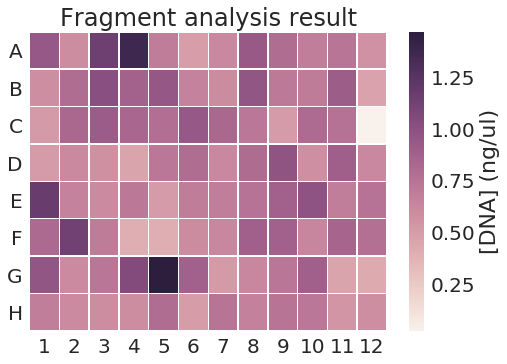

In [22]:
chip_conc
#plot the chip as a heat map
c = chip_conc.iloc[:,1:]
c = c[c.columns].astype(float)
sns.heatmap(c,linewidths=.5,yticklabels=rows,cbar_kws={'label': '[DNA] (ng/ul)'}) #
sns.set(font_scale = 2)
plt.yticks(rotation=0)
plt.title('Fragment analysis result')
plt.show()

In [7]:
# this processes the scaffold cart list before turning it into a dataframe. (this is more for historical reasons than out of necessity)
dataset = [data[0][0:16]]
for i in range(1,len(data)):
    #dataset.append([data[i][0],data[i][1],data[i][2],data[i][3],data[i][4]+data[i][5]+data[i][6]+data[i][7]+data[i][8],data[i][9],data[i][10],data[i][11],data[i][12],data[i][13],data[i][14],data[i][15],data[i][16],data[i][17],data[i][18],data[i][19],data[i][20]])
    dataset.append(data[i][0:16])
    if dataset[i][8]=='':
        for j in range(8,15):
            dataset[i][j]='Unassigned'
            #dataset[i][15]=0
    elif dataset[i][9]=='':
        for j in range(9,15):
            dataset[i][j]='Unassigned'
            #dataset[i][15]=0
    elif dataset[i][10]=='':
        for j in range(10,15):
            dataset[i][j]='Unassigned'
            #dataset[i][15]=0
    elif dataset[i][11]=='':
        for j in range(11,15):
            dataset[i][j]='Unassigned'
            #dataset[i][15]=0
    elif dataset[i][12]=='':
        for j in range(12,15):
            dataset[i][j]='Unassigned'
            #dataset[i][15]=0
    elif dataset[i][13]=='':
        for j in range(13,15):
            dataset[i][j]='Unassigned'
            #dataset[i][15]=0
    elif dataset[i][14]=='':
        dataset[i][14]='Unassigned'
        
    if dataset[i][15]=='':
        dataset[i][15]='0'
      
        
df = pd.DataFrame.from_records(dataset[1:],columns=dataset[0])
#df_ = pd.DataFrame({'A' : []})
#df.append(df_)
#convert specific columns to integers (or floats, ...)

df['Scaffold Name'] = df['Scaffold Name'].astype(np.int)
df['Gene Count'] = df['Gene Count'].astype(np.int)
df['Sequence Length'] = df['Sequence Length'].astype(np.int)
df['GC Content'] = df['GC Content'].astype(np.float)
df = df.sort_values('Scaffold Name') # sort according to annotation number 
df = df.reset_index(drop=True) # reset the row numbers 
#df['Lineage Percentage'] = df['Lineage Percentage'].astype(np.float) # this does not work, perhaps because of empty values
# make crispr file dataframe
df_crispr = pd.DataFrame.from_records(crisprs,columns=['assembly','contig','number','startseq','repeat','intermediate'])
df_crispr.contig =  df_crispr.contig.astype(np.int)
# get the contigs that contain CRISPRS
crisprContigs = df_crispr.contig.unique()

In [8]:
# append a column to the dataframe 
df['CRISPR'] = 'NO'
for i in range(0,len(crisprContigs)):
    x=df[df['Scaffold Name'] == crisprContigs[i]]
    df.iloc[x.index[0],16] = 'YES'
# append other columns to the main dataframe
df['well_counts'] = ''
df['k4_x'] = tSNE_k4['x'];df['k4_y'] = tSNE_k4['y'];df['k5_x'] = tSNE_k5['x'];df['k5_y'] = tSNE_k5['y']

# make contigorigin dataframe
df_contigorigin = pd.DataFrame.from_records(contigorigin2,columns=['contig_name'])
#df_contigorigin['Assembly'], df_contigorigin['scaffold_name'] = df_contigorigin['contig_name'].str.split('\t',1).str
df_contigorigin = df_contigorigin['contig_name'].str.split('\t', 1, expand=True)
df_contigorigin.columns = ['contig_name','scaffold_name']
# split column to get contig ID number
#df_contigorigin = df_contigorigin['scaffold_name'].str.split('_', 1, expand=True)
df_contigorigin['Assembly'], df_contigorigin['scaffold_num'] = df_contigorigin['scaffold_name'].str.split('_',1).str
#df_contigorigin.columns = ['contig_name','scaffold_name','scaffold_num']
df_contigorigin['scaffold_num'] = df_contigorigin['scaffold_num'].astype(np.int)

# append column and assign assembly type/origin
df_contigorigin['type'] = ''
for i in range(0,len(contigorigin)):
    if "flag" in contigorigin[i] and "Bulk" in contigorigin[i]:
        df_contigorigin.iloc[i,4] = 'megahit'
    elif "NODE" in contigorigin[i] and "Bulk" in contigorigin[i]:
        df_contigorigin.iloc[i,4] = 'metaSPAdes'
    else:
        df_contigorigin.iloc[i,4] = 'minimetagenomics'

df['Genome ID'] = df_contigorigin['type']

# find a way to replace the column names of 'alignment_report' with the corresponding ufluidic chamber number    
barcodes_used = list(alignment_report)
barcodes_made = list(demux.iloc[:,3])
barcodes_unused = pd.DataFrame(columns=['Unused_barcodes', 'corresp_well'])
AR_contigs = pd.DataFrame(columns=['ContigName'])
AR_contigs['ContigName']= alignment_report.iloc[:,0];j=0
for i in range(0,len(barcodes_made)):
    if barcodes_made[i] in alignment_report.columns:
        AR2 = alignment_report.filter(regex=barcodes_made[i])
        AR_contigs[demux.iloc[i,5]] = AR2
    else:
        barcodes_unused.loc[j] = [demux.iloc[i,3],demux.iloc[i,5]];j+=1
print(barcodes_unused)



# add well numbers to 'df'
wells = list(AR_contigs)
emptywellframe = pd.DataFrame(columns=wells)
df =  df.join([emptywellframe])


           Unused_barcodes corresp_well
0         IL1604-N715-S513          A12
1         IL1604-N715-S516          C12
2  Obsidian3Bulk-N718-S522          NaN
3  Obsidian3Bulk-N724-S522          NaN


In [9]:
# now add alignment report wells to corresponding contigs
contigs_alignmentreport = list(AR_contigs.iloc[:,0])
for i in range(0,len(contigs_alignmentreport)):
    if df_contigorigin['contig_name'].str.contains(contigs_alignmentreport[i]).any():
        #boolframe = df_contigorigin['contig_name'].str.contains(contigs_alignmentreport[i]) #these two lines also work, instead of the two below
        #idx = boolframe[boolframe == True].index[0]
        idx = df_contigorigin.loc[df_contigorigin['contig_name'] == contigs_alignmentreport[i]]
        #x = df.loc[df['Scaffold Name'] == df_contigorigin.iloc[idx.index[0],3]] #this is the contig number that needs to be found in 'df' 
        df.iloc[idx.index[0],22] = AR_contigs.iloc[i,0]
        df.iloc[idx.index[0],23:] = AR_contigs.iloc[i,1:].astype(np.float)
        #print(df_contigorigin.index.get_loc(df_contigorigin['contig_name'] == contigs_alignmentreport[i]))
    else:
        print('contig not in file')

In [10]:
# set a threshold for the normalized alignment report value
threshold = 0.1
# count all wells above this threshold for each contig, add the contig counts to 'well_counts'
v = np.where(df.iloc[:,23:] > threshold ,1,0)
w = []
for j in range(0,len(v)):
    w.append(sum(v[j]))
df['well_counts'] = w

In [11]:
#selecting on two criteria, e.g the rows of minimeta contigs containing CRISPR hits
a = df[df['CRISPR'].str.contains("YES")];
b = a[a['Genome ID'].str.contains('minimetagenomics')];b

,Scaffold ID,Scaffold Name,Genome ID,Genome,Gene Count,Sequence Length,GC Content,Read Depth,Lineage Domain,Lineage Phylum,...,H03,H04,H05,H06,H07,H08,H09,H10,H11,H12
4058,3300017562 assembled Ga0186926,14059,minimetagenomics,Hotspring sediment microbial communities from ...,28,26374,0.42,1,Bacteria,Aquificae,...,0.118147,0.00947903,0.605293,0,0.0946387,0.0224843,0.188557,0.0236217,0.315273,0
4126,3300017562 assembled Ga0186926,14127,minimetagenomics,Hotspring sediment microbial communities from ...,18,18172,0.34,1,Unassigned,Unassigned,...,0.00996038,0,0.465276,0.21258,0,0.0179947,0.0121065,0.291492,0,0
4183,3300017562 assembled Ga0186926,14184,minimetagenomics,Hotspring sediment microbial communities from ...,13,15301,0.41,1,Bacteria,Unassigned,...,0,0.00614339,0,0,0,0,0,0,0,0
4221,3300017562 assembled Ga0186926,14222,minimetagenomics,Hotspring sediment microbial communities from ...,3,13929,0.58,1,Unassigned,Unassigned,...,0,0.0298657,0,0.0115586,0.00244095,0,0.00229737,0.0169431,0.00667672,0
4247,3300017562 assembled Ga0186926,14248,minimetagenomics,Hotspring sediment microbial communities from ...,12,13430,0.37,1,Bacteria,Unassigned,...,0,0,0,0,0,0,0,0,0,0
4248,3300017562 assembled Ga0186926,14249,minimetagenomics,Hotspring sediment microbial communities from ...,11,13426,0.41,1,Bacteria,Aquificae,...,0.00402205,0.142336,0.133174,0.00573514,0.141367,0.035677,0.372561,0.0749292,0.570237,0
4286,3300017562 assembled Ga0186926,14287,minimetagenomics,Hotspring sediment microbial communities from ...,12,12612,0.41,1,Bacteria,Aquificae,...,0.165398,0,0.43863,0,0,0.0118934,0.00856327,0.126229,0.393356,0.0288614
4306,3300017562 assembled Ga0186926,14307,minimetagenomics,Hotspring sediment microbial communities from ...,12,12061,0.43,1,Unassigned,Unassigned,...,0.49316,0,0,0,0.0281071,0.0198988,0,0,0,0.00945195
4348,3300017562 assembled Ga0186926,14349,minimetagenomics,Hotspring sediment microbial communities from ...,9,11254,0.42,1,Archaea,Unassigned,...,0,0,0,0,0,0,0,0,0,0.544429
4359,3300017562 assembled Ga0186926,14360,minimetagenomics,Hotspring sediment microbial communities from ...,10,11048,0.45,1,Archaea,Thaumarchaeota,...,0.0311369,0.0113143,0.0145728,0,0,0.0161115,0,0.0019008,0,0


In [68]:
# turn the columns with the well coordinates into something plottable - heatmap style
# e.g. plotting the double selected dataframe 'b' above into a heatmap, 8x12

#make a 8x12 dataframe
def minimetaWells(dataframe,plot,norm):
    cols = [0,1,2,3,4,5,6,7,8,9,10,11,12];rows = ['A','B','C','D','E','F','G','H']
    chip = pd.DataFrame(columns=cols)
    chip[0] = rows;
    colnames = list(df);colnames = colnames[23:];k=0;
    selectedcontigs = dataframe.iloc[:,23:]
    if norm == 'YES':
        for i in range(23,len(colnames)+23):
            selectedcontigs.iloc[:,k] = dataframe.iloc[:,i]/np.sum(dataframe.iloc[:,23:],1) #apply threshold here
            k+=1
    for j in range(0,len(selectedcontigs)):
        subselection = selectedcontigs.iloc[j,:]
        for i in colnames:
            if j == 0:
                if 'A' in i:
                    chip.iloc[0,int(i[1:3])] = subselection[i]                    
                elif 'B' in i:
                    chip.iloc[1,int(i[1:3])] = subselection[i]
                elif 'C' in i:
                    chip.iloc[2,int(i[1:3])] = subselection[i]
                elif 'D' in i:
                    chip.iloc[3,int(i[1:3])] = subselection[i]
                elif 'E' in i:
                    chip.iloc[4,int(i[1:3])] = subselection[i]
                elif 'F' in i:
                    chip.iloc[5,int(i[1:3])] = subselection[i]
                elif 'G' in i:
                    chip.iloc[6,int(i[1:3])] = subselection[i]
                elif 'H' in i:
                    chip.iloc[7,int(i[1:3])] = subselection[i] 
            else: 
                if 'A' in i:
                    chip.iloc[0,int(i[1:3])] = chip.iloc[0,int(i[1:3])] + subselection[i]
                elif 'B' in i:
                    chip.iloc[1,int(i[1:3])] = chip.iloc[1,int(i[1:3])] + subselection[i]
                elif 'C' in i:
                    chip.iloc[2,int(i[1:3])] = chip.iloc[2,int(i[1:3])] + subselection[i]
                elif 'D' in i:
                    chip.iloc[3,int(i[1:3])] = chip.iloc[3,int(i[1:3])] + subselection[i]
                elif 'E' in i:
                    chip.iloc[4,int(i[1:3])] = chip.iloc[4,int(i[1:3])] + subselection[i]
                elif 'F' in i:
                    chip.iloc[5,int(i[1:3])] = chip.iloc[5,int(i[1:3])] + subselection[i]
                elif 'G' in i:
                    chip.iloc[6,int(i[1:3])] = chip.iloc[6,int(i[1:3])] + subselection[i]
                elif 'H' in i:
                    chip.iloc[7,int(i[1:3])] = chip.iloc[7,int(i[1:3])] + subselection[i]  
    if plot == 'ON':
        #plot the chip as a heat map
        c = chip.iloc[:,1:]
        c = c[c.columns].astype(float)
        #cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
        #sns.heatmap(c, cmap=cmap, mask=c.isnull())
        sns.heatmap(c,linewidths=.5,yticklabels=rows) #
        sns.set(font_scale = 2)
        plt.yticks(rotation=0)
        plt.show()
        
    
    return(chip)

In [14]:
# add column with the number of hits (above threshold) (minimeta) contig has in the wells
#df['minimeta_occurrence'] = ''
a = df.iloc[6,18:].count()

# select the rows in the dataframe that fall within tSNE x,y values specified

def select_tSNEregion(dataframe,kmertype,x_lo,x_hi,y_lo,y_hi,plot):
    #kmertype has to be a string, 'k4' OR 'k5'
    if kmertype == 'k4':
        k_contigs = dataframe.loc[(dataframe['k4_x'] >= x_lo) & (dataframe['k4_x'] <= x_hi) & (dataframe['k4_y'] >= y_lo) & (dataframe['k4_y'] <= y_hi)]
    elif kmertype == 'k5':
        k_contigs1 = dataframe.loc[(dataframe['k5_x'] >= x_lo) & (dataframe['k5_x'] <= x_hi)] 
        k_contigs = k_contigs1.loc[(k_contigs1['k5_y'] >= y_lo) & (k_contigs1['k5_y'] <= y_hi)]
    
    if plot == 'ON':
        # plot tSNE, selected region shown, and inset 
        f, ax = plt.subplots()
        if kmertype == 'k4':
            plt.subplot(311)
            plt.scatter(dataframe['k4_x'],dataframe['k4_y'],s=dataframe['Sequence Length']/5e2,alpha=0.2)

            plt.subplot(312)
            plt.scatter(dataframe['k4_x'],dataframe['k4_y'],s=dataframe['Sequence Length']/5e2,alpha=0.2)
            plt.plot([x_lo,x_hi],[y_lo,y_lo],'-k')
            plt.plot([x_lo,x_hi],[y_hi,y_hi],'-k')
            plt.plot([x_lo,x_lo],[y_lo,y_hi],'-k')
            plt.plot([x_hi,x_hi],[y_lo,y_hi],'-k')

            plt.subplot(313)
            plt.scatter(k_contigs['k4_x'],k_contigs['k4_y'],s=k_contigs['Sequence Length']/1e2,alpha=0.2)
            plt.xlim(x_lo,x_hi)
            plt.ylim(y_lo,y_hi)
            
        elif kmertype == 'k5':
            plt.subplot(311)
            plt.scatter(dataframe['k5_x'],dataframe['k5_y'],s=dataframe['Sequence Length']/5e2,alpha=0.2)

            plt.subplot(312)
            plt.scatter(dataframe['k5_x'],dataframe['k5_y'],s=dataframe['Sequence Length']/5e2,alpha=0.2)
            plt.plot([x_lo,x_hi],[y_lo,y_lo],'-k')
            plt.plot([x_lo,x_hi],[y_hi,y_hi],'-k')
            plt.plot([x_lo,x_lo],[y_lo,y_hi],'-k')
            plt.plot([x_hi,x_hi],[y_lo,y_hi],'-k')

            plt.subplot(313)
            plt.scatter(k_contigs['k5_x'],k_contigs['k5_y'],s=k_contigs['Sequence Length']/1e1,alpha=0.2)
            plt.xlim(x_lo,x_hi)
            plt.ylim(y_lo,y_hi)
            
        f.set_figheight(24)
        f.set_figwidth(8)
        plt.show()
    
    return(k_contigs)

# select contigs that are not minimeta
def selectNotMinimeta(dataframe):
    bulk = dataframe[~dataframe['Genome ID'].str.contains('minimetagenomics')]
    return(bulk)

# select contigs that are  minimeta
def selectMinimeta(dataframe):
    mini = dataframe[dataframe['Genome ID'].str.contains('minimetagenomics')]
    return(mini)

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


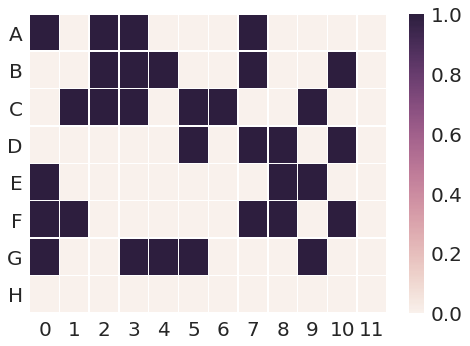

,1,2,3,4,5,6,7,8,9,10,11,12
0,0.9474,0.5967,1.1480,1.3735,0.6933,0.4963,0.6274,0.9380,0.7931,0.6855,0.7426,0.5646
1,0.5846,0.7937,1.0110,0.8728,0.9506,0.6606,0.6036,0.9692,0.7171,0.6981,0.9141,0.4695
2,0.5193,0.8360,0.9156,0.8398,0.7829,0.9446,0.8354,0.7280,0.5079,0.8120,0.7577,0.0260
3,0.5123,0.6130,0.5757,0.4609,0.7245,0.8020,0.6229,0.8064,0.9783,0.5818,0.8946,0.6234
4,1.1780,0.6610,0.6109,0.7208,0.5149,0.6903,0.6855,0.7522,0.8869,0.9830,0.6898,0.7566
5,0.8154,1.1303,0.7003,0.4052,0.4033,0.6003,0.6328,0.8921,0.8799,0.6351,0.8577,0.7752
6,0.9667,0.6094,0.7311,1.0548,1.4665,0.8826,0.5209,0.6313,0.7384,0.8879,0.4618,0.4276
7,0.6889,0.6102,0.5981,0.5914,0.7928,0.4990,0.7518,0.6668,0.7504,0.7292,0.5440,0.5867


In [23]:
# get logical heatmap 
d = np.where(c > 0.8, 1,0)
sns.heatmap(d,yticklabels=rows,linewidths=.5)
plt.yticks(rotation=0)
plt.show()
c

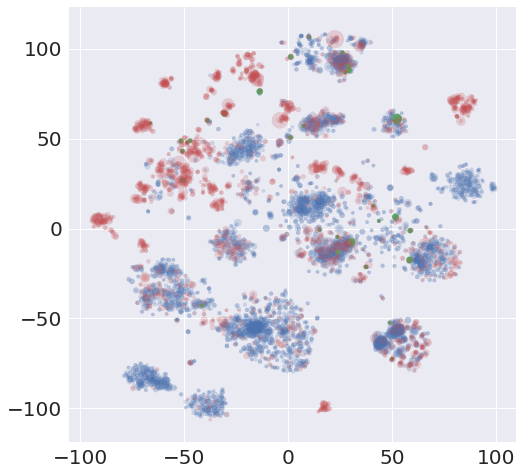

In [36]:
#a = df[df['CRISPR'].str.contains("YES")];
#b = a[a['Genome ID'].str.contains('minimetagenomics')];b
mini = selectMinimeta(df)
bulk = selectNotMinimeta(df)
f,ax = plt.subplots()
plt.scatter(bulk['k4_x'],bulk['k4_y'],s=df['Sequence Length']/5e2, alpha=0.2)
plt.scatter(b['k4_x'],b['k4_y'],s=df['Sequence Length']/5e2)
plt.scatter(mini['k4_x'],mini['k4_y'],s=df['Sequence Length']/5e2,alpha=0.2)
f.set_figheight(8)
f.set_figwidth(8)
plt.show()

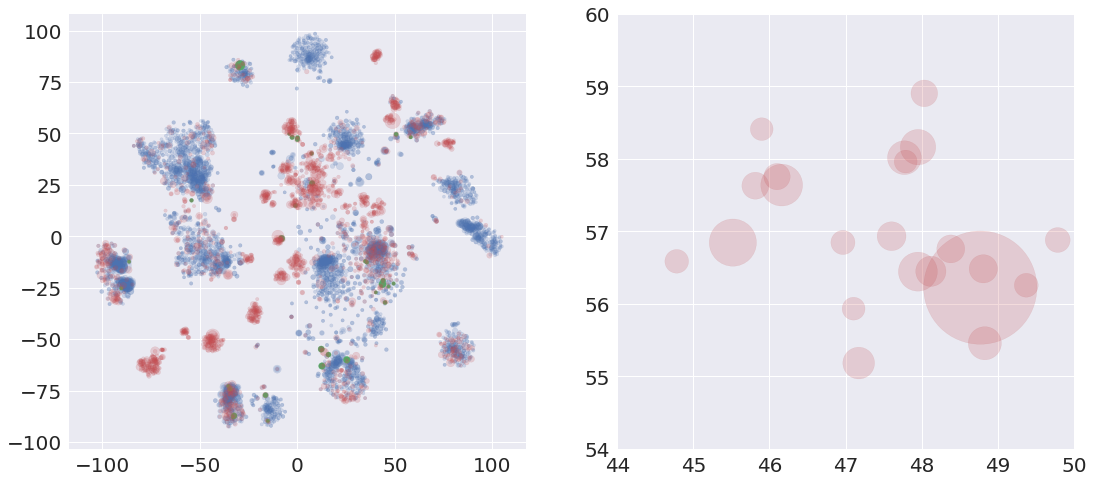

In [37]:
mini = df[df['Genome ID'].str.contains('minimetagenomics')]
f, ax = plt.subplots()

plt.subplot(121)
plt.scatter(bulk['k5_x'],bulk['k5_y'],s=bulk['Sequence Length']/5e2,alpha=0.2)
plt.scatter(b['k5_x'],b['k5_y'],s=df['Sequence Length']/5e2)
plt.scatter(mini['k5_x'],mini['k5_y'],s=df['Sequence Length']/5e2,alpha=0.2)

plt.subplot(122)
plt.scatter(bulk['k5_x'],bulk['k5_y'],s=bulk['Sequence Length']/1e2,alpha=0.2)
plt.scatter(b['k5_x'],b['k5_y'],s=df['Sequence Length']/1e2)
plt.scatter(mini['k5_x'],mini['k5_y'],s=df['Sequence Length']/1e1,alpha=0.2)
plt.xlim(44,50)
plt.ylim(54,60)

f.set_figheight(8)
f.set_figwidth(18)
plt.show()

In [438]:
np.where(c > 1, 1,0)

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0]])

In [368]:
# save a bunch of images to a gif

import imageio
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('/path/to/movie.gif', images)

1

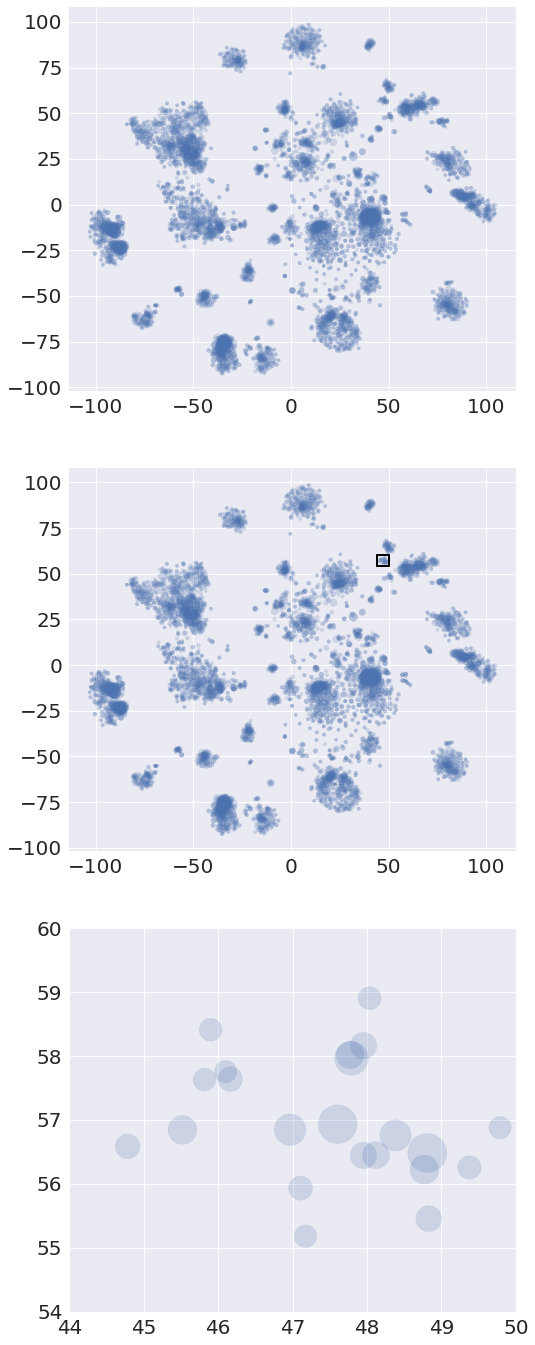

In [38]:
selected_data = select_tSNEregion(df,'k5',44,50,54,60,'ON')

In [663]:
#minimetaWells(selected_data)
selected_data

,Scaffold ID,Scaffold Name,Genome ID,Genome,Gene Count,Sequence Length,GC Content,Read Depth,Lineage Domain,Lineage Phylum,...,H03,H04,H05,H06,H07,H08,H09,H10,H11,H12
4184,3300017562 assembled Ga0186926,14185,minimetagenomics,Hotspring sediment microbial communities from ...,20,15277,0.52,1,Archaea,Crenarchaeota,...,0,0,0,0,0,0,0,0,0,0
4194,3300017562 assembled Ga0186926,14195,minimetagenomics,Hotspring sediment microbial communities from ...,16,15081,0.49,1,Archaea,Crenarchaeota,...,0,0,0,0,0,0.131623,0,0,0,0
4344,3300017562 assembled Ga0186926,14345,minimetagenomics,Hotspring sediment microbial communities from ...,13,11332,0.49,1,Archaea,Crenarchaeota,...,0,0,0,0,0,0.0213555,0,0,0,0
4454,3300017562 assembled Ga0186926,14455,minimetagenomics,Hotspring sediment microbial communities from ...,14,9984,0.48,1,Archaea,Crenarchaeota,...,0,0,0,0,0,0.135417,0,0,0,0
4474,3300017562 assembled Ga0186926,14475,minimetagenomics,Hotspring sediment microbial communities from ...,11,9778,0.51,1,Archaea,Crenarchaeota,...,0,0,0,0,0,0.646451,0,0,0,0
4667,3300017562 assembled Ga0186926,14668,minimetagenomics,Hotspring sediment microbial communities from ...,12,8380,0.54,1,Archaea,Crenarchaeota,...,0,0,0,0,0,0,0,0,0,0
4677,3300017562 assembled Ga0186926,14678,minimetagenomics,Hotspring sediment microbial communities from ...,10,8306,0.45,1,Archaea,Crenarchaeota,...,0,0,0,0,0,0,0,0,0,0
4803,3300017562 assembled Ga0186926,14804,minimetagenomics,Hotspring sediment microbial communities from ...,8,7753,0.49,1,Archaea,Crenarchaeota,...,0,0,0,0,0,0.314846,0,0,0,0
4910,3300017562 assembled Ga0186926,14911,minimetagenomics,Hotspring sediment microbial communities from ...,10,7300,0.51,1,Archaea,Crenarchaeota,...,0,0,0,0,0,0,0,0,0,0
4962,3300017562 assembled Ga0186926,14963,minimetagenomics,Hotspring sediment microbial communities from ...,7,7090,0.50,1,Archaea,Crenarchaeota,...,0,0,0,0,0.0172073,0,0,0,0,0


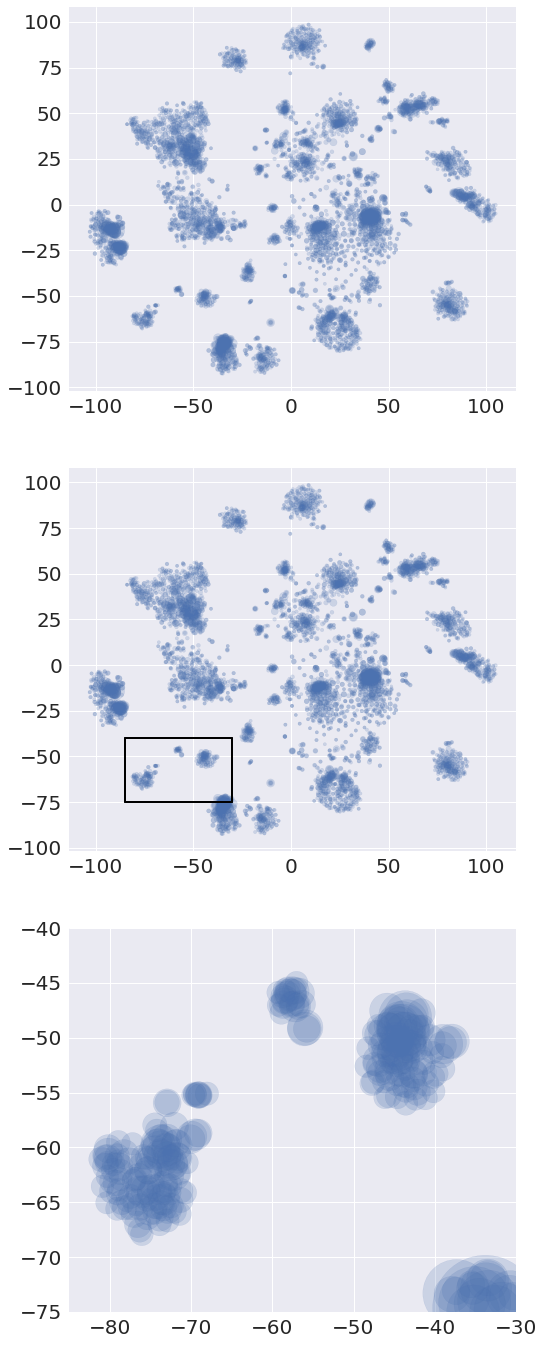

In [39]:
selected_data2 = select_tSNEregion(df,'k5',-85,-30,-75,-40,'ON')

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


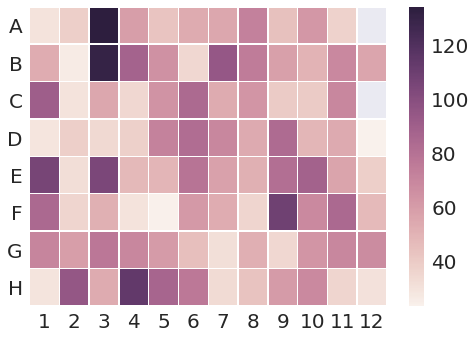

In [73]:
#plot all minimeta contig hits in alignment report
mini = selectMinimeta(df)
chip = minimetaWells(mini,'ON',"no")

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


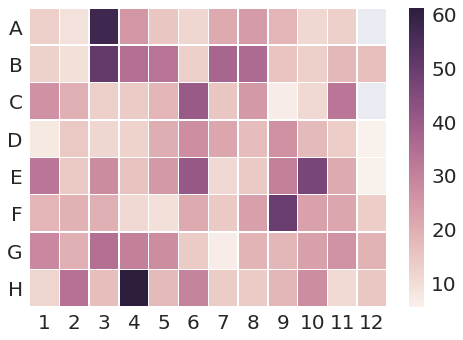

In [70]:
chip2 = minimetaWells(mini,'ON',"YES")

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


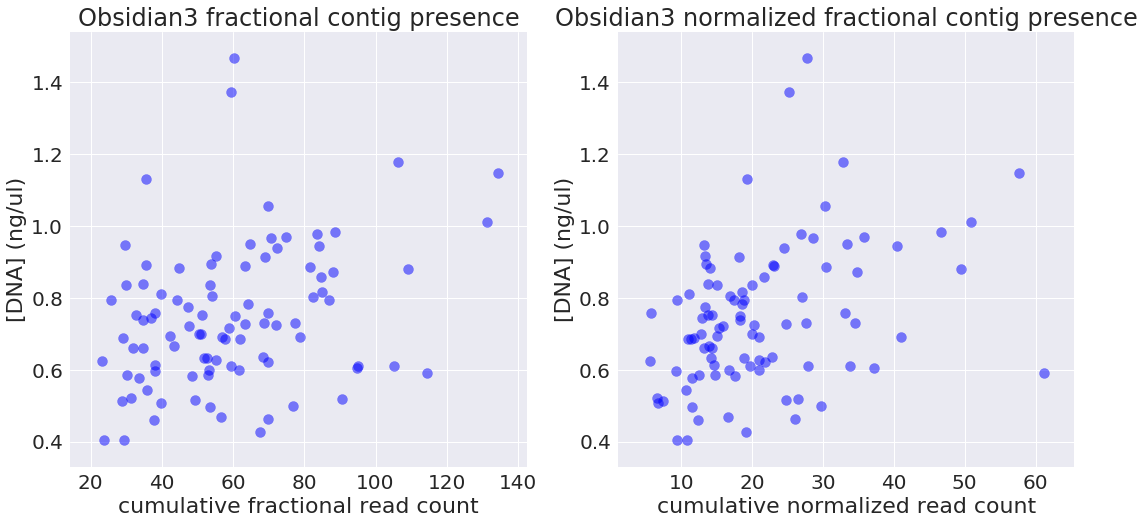

In [74]:
#plot the contig hits vs. DNA concentration .
f, ax = plt.subplots()
plt.subplot(121)
for i in range(1,13):
    plt.scatter(chip[i],chip_conc[i],s=100,c='blue',alpha=0.5)

plt.title(expt_name+' fractional contig presence')
plt.xlabel('cumulative fractional read count')
plt.ylabel('[DNA] (ng/ul)')

plt.subplot(122)
for i in range(1,13):
    plt.scatter(chip2[i],chip_conc[i],s=100,c='blue',alpha=0.5)
plt.title(expt_name+' normalized fractional contig presence')
plt.xlabel('cumulative normalized read count')
plt.ylabel('[DNA] (ng/ul)')    

f.set_figheight(8)
f.set_figwidth(18)
plt.show()

In [77]:
def plotallphyla(df,lineage,unass):
    
    # this function starts with plotting the chip and tSNE of the entire experiment
    # then shows which is minimeta in the same configuration 
    # then cycles through all detected phyla, plotting them on the tSNE and their well presence 
    # then outputs an array containing the summed counts of df['Well counts'] per phylum 
    
    # lineage" must be a string naming one of the columns starting with "Lineage", e.g. 'Lineage Phylum' 
    
    minimeta = selectMinimeta(df)
    if unass == 'include':
        assigned_mini = minimeta
    else:
        assigned_mini = minimeta[~minimeta[lineage].str.contains('Unassigned')]
    listassigned = assigned_mini[lineage].unique()
    numspec = len(listassigned)
    counts = [];chipcount = []
    countdf = pd.DataFrame(columns=[lineage[8:],'counts','chip','fractional occup.','mean_occup.','number of cells','num_contigs'])
    countdf[lineage[8:]] = listassigned
    f,ax = plt.subplots()
    
    for i in listassigned:
        f,ax = plt.subplots()
        tempdf = assigned_mini[assigned_mini[lineage].str.contains(i)]
        counts.append(sum(tempdf['well_counts']))
        chip = minimetaWells(tempdf)
        c = chip.iloc[:,1:]
        c = c[c.columns].astype(float)

        plt.subplot(121)
        sns.heatmap(c,linewidths=.5,yticklabels=rows) #
        sns.set(font_scale = 2)
        plt.yticks(rotation=0)
        #plt.show()
        
        #plt.
        # get logical heatmap
        a = np.max(c)
        a = np.max(a)
        plt.title(i)
        
        
        plt.subplot(122)
        d = np.where(c > 0.1*a, 1,0)
        sns.heatmap(d,yticklabels=rows,linewidths=.5)
        plt.yticks(rotation=0)
        
        chipcount.append(sum(sum(d)))

        f.set_figwidth(18)
        f.set_figheight(8)
        #plt.show()
        
        #f.savefig(expt_name+'_'+'minimetawells_'+lineage[8:]+':'+i+'_lowthres.png')
        #plt.clf()
        f.clf()
        
    countdf['counts'] = counts
    countdf['chip'] = chipcount
    countdf['fractional occup.'] = np.asarray(chipcount)/len(df.iloc[0,23:])
    countdf['mean_occup.'] = -np.log(1-countdf['fractional occup.'])
    countdf['number of cells'] = countdf['chip']*countdf['mean_occup.']*len(df.iloc[0,23:])
    
    return(countdf)
    

In [953]:
abundance = plotallphyla(df)
#c = chip.iloc[:,1:]
#c = c[c.columns].astype(float)
#a = np.max(c)
#a = np.max(a)
#d = np.where(c > 0.3*a, 1,0)
#sum(sum(d))

#chip"""

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [76]:
bla ="lineage phylum"
bla[8:]

'phylum'

In [968]:
abundance

,phylum,counts,chip,fractional occup.,mean_occup.,number of cells,num_contigs
0,Aquificae,2165,54,0.574468,0.854415,100.138428,NaN
1,Crenarchaeota,2307,70,0.744681,1.365241,165.566867,NaN
2,Firmicutes,160,24,0.255319,0.294800,31.075189,NaN
3,Thermodesulfobacteria,1009,55,0.585106,0.879733,103.385322,NaN
4,Thaumarchaeota,739,43,0.457447,0.611469,69.293173,NaN
5,Euryarchaeota,771,35,0.372340,0.465757,51.301507,NaN
6,Aminicenantes,56,6,0.063830,0.065958,6.395748,NaN
7,Chloroflexi,120,4,0.042553,0.043485,4.173940,NaN
8,Proteobacteria,453,38,0.404255,0.517943,57.681837,NaN
9,Fervidibacteria,161,8,0.085106,0.088947,8.711580,NaN


/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


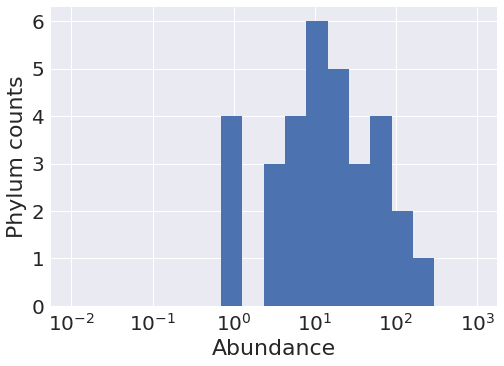

In [976]:
plt.hist(abundance['number of cells'], bins=np.logspace(-2,3,20))#*len(df.iloc[0,23
plt.xscale('log')
plt.ylabel('Phylum counts')
plt.xlabel('Abundance')
plt.show()

In [969]:
sum(abundance['number of cells'])

905.84968748346796

In [967]:
abundance['number of cells'] = abundance['chip']+abundance['chip']*abundance['mean_occup.']

In [966]:
np.log(2.7)

0.99325177301028345

In [981]:
len(df["Lineage Species"].unique())

98

In [982]:
a= selectMinimeta(df)
len(a['Lineage Species'].unique())

70

In [983]:
a= selectNotMinimeta(df)
len(a['Lineage Species'].unique())

57